In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the files
gdp_data = pd.read_excel('GDP_current.xlsx', index_col = 'Years')
gdp_growth_data = pd.read_excel('GDP_growth.xlsx', index_col = 'Years')
gdp_per_capita_data = pd.read_excel('GDP_per_capita.xlsx', index_col = 'Years')


In [3]:
# Data Cleaning Process

# Checking for missing values in each dataset
missing_values_gdp = gdp_data.isnull().sum()
missing_values_gdp_growth = gdp_growth_data.isnull().sum()
missing_values_gdp_per_capita = gdp_per_capita_data.isnull().sum()


missing_values_gdp, missing_values_gdp_growth, missing_values_gdp_per_capita

(World             0
 France            0
 European Union    0
 dtype: int64,
 World             0
 France            0
 European Union    0
 dtype: int64,
 World             0
 France            0
 European Union    0
 dtype: int64)

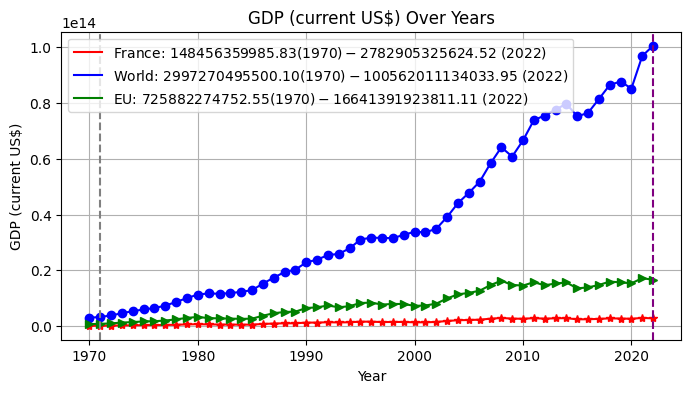

In [4]:
# Plotting the GDP data
plt.figure(figsize=(8, 4))
plt.plot(gdp_data.index, gdp_data['World'], label='World', color='blue',marker = "o")
plt.plot(gdp_data.index, gdp_data['France'], label='France', color='red',marker ="*")
plt.plot(gdp_data.index, gdp_data['European Union'], label='European Union', color='green',marker =">")
plt.title('GDP (current US$) Over Years')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.axvline(x=1971, color='gray', linestyle='--')
plt.axvline(x=2022, color='purple', linestyle='--')  # Replaced 2020 with 2022

# Get the GDP values for France, World, and European Union in 1970 and 2022
gdp_france_1970 = gdp_data.loc[1970, 'France']
gdp_world_1970 = gdp_data.loc[1970, 'World']
gdp_eu_1970 = gdp_data.loc[1970, 'European Union']
gdp_france_2022 = gdp_data.loc[2022, 'France']  # Replaced 2020 with 2022
gdp_world_2022 = gdp_data.loc[2022, 'World']    # Replaced 2020 with 2022
gdp_eu_2022 = gdp_data.loc[2022, 'European Union']  # Replaced 2020 with 2022

# Define custom legend entries with specific colors for France, World, and European Union
custom_legend = [
    plt.Line2D([0], [0], color='red', linestyle='-', label=f'France: ${gdp_france_1970:.2f} (1970) - ${gdp_france_2022:.2f} (2022)'),
    plt.Line2D([0], [0], color='blue', linestyle='-', label=f'World: ${gdp_world_1970:.2f} (1970) - ${gdp_world_2022:.2f} (2022)'),
    plt.Line2D([0], [0], color='green', linestyle='-', label=f'EU: ${gdp_eu_1970:.2f} (1970) - ${gdp_eu_2022:.2f} (2022)'),
]

# Combine the custom legend entries with the existing legend
plt.legend(handles=custom_legend)

plt.grid(True)

# Save the plot as a PNG file
plt.savefig('GDP_current_plot.png')

# Show the plot
plt.show()


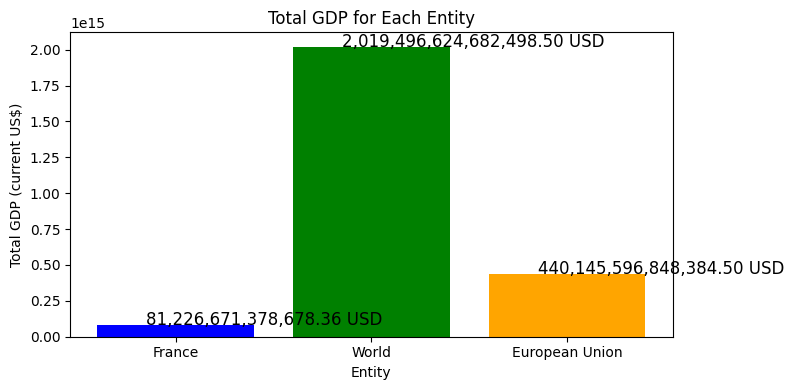

In [5]:
# Calculate the total GDP for each entity
total_gdp_france = gdp_data['France'].sum()
total_gdp_world = gdp_data['World'].sum()
total_gdp_eu = gdp_data['European Union'].sum()

# Create a bar chart to visualize the total GDP values
entities = ['France', 'World', 'European Union']
total_gdps = [total_gdp_france, total_gdp_world, total_gdp_eu]

plt.figure(figsize=(8, 4))
bars = plt.bar(entities, total_gdps, color=['blue', 'green', 'orange'])
plt.xlabel('Entity')
plt.ylabel('Total GDP (current US$)')
plt.title('Total GDP for Each Entity')

# Add legends showing the values on top of the bars
for bar, value in zip(bars, total_gdps):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1000000000, f'{value:,.2f} USD', fontsize=12)

# Show the chart
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

# Function to process each dataframe by dividing it into decades and calculating the mean for each decade
def process_decade_data(df):
    df['Decade'] = (df['Years'] // 10) * 10  # Create a 'Decade' column
    decade_df = df.groupby('Decade').mean()  # Group by decade and calculate mean
    decade_df = decade_df.drop(columns=['Years'], errors='ignore')  # Dropping 'Years' column
    return decade_df

# Function to format the dataframe for display
def format_dataframe(df):
    return df.head().to_string()

# Load the Excel files into pandas dataframes
files = {
    "GDP_current": "GDP_current.xlsx",
    "GDP_per_capita": "GDP_per_capita.xlsx",
    "Life_Expectancy": "Life_Expectancy.xlsx",
    "Population_total": "Population_total.xlsx",
    "Trade_percentage_of_gdp": "Trade_percentage_of_gdp.xlsx"
}

# Read the files into pandas dataframes
dfs = {name: pd.read_excel(path) for name, path in files.items()}

# Process each dataframe
processed_dfs = {name: process_decade_data(df) for name, df in dfs.items()}

# Format and display each dataframe
formatted_dfs = {name: format_dataframe(df) for name, df in processed_dfs.items()}

# Example of displaying one of the formatted dataframes
print(formatted_dfs['GDP_current'])
print(formatted_dfs['GDP_per_capita'])
print(formatted_dfs["Life_Expectancy"])
print(formatted_dfs["Population_total"])
print(formatted_dfs['Trade_percentage_of_gdp'])
                    

               World        France  European Union
Decade                                            
1970    5.871955e+12  3.331991e+11    1.613122e+12
1980    1.440112e+13  7.295113e+11    3.559425e+12
1990    2.847174e+13  1.431264e+12    7.491979e+12
2000    4.685959e+13  2.101815e+12    1.145131e+13
2010    7.807930e+13  2.688899e+12    1.497875e+13
               World        France  European Union
Decade                                            
1970     1432.450260   6194.245569     4042.859377
1980     2967.435124  12894.659959     8594.537622
1990     4994.131944  24086.874882    17611.079626
2000     7144.408906  33262.885945    26272.462783
2010    10597.769821  40561.390844    33732.430065
            World     France  European Union
Decade                                      
1970    59.890638  72.739512       71.790179
1980    63.679377  75.180000       73.790056
1990    66.192686  77.686829       75.650890
2000    69.056819  80.147073       78.205730
2010    71.91700

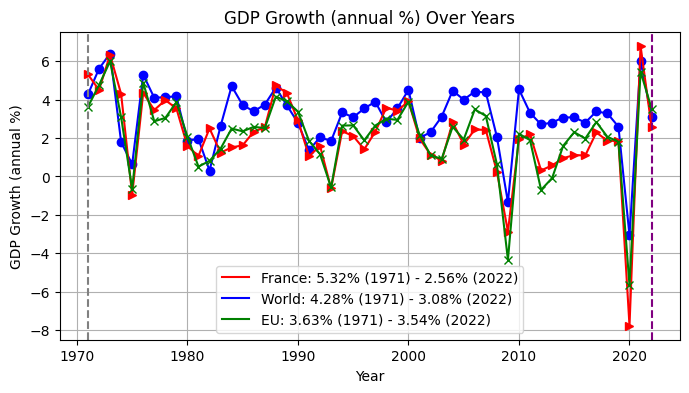

In [6]:
# Plotting the GDP Growth data
plt.figure(figsize=(8, 4))
plt.plot(gdp_growth_data.index, gdp_growth_data['World'], label='World', color='blue',marker ="o")
plt.plot(gdp_growth_data.index, gdp_growth_data['France'], label='France', color='red',marker = ">")
plt.plot(gdp_growth_data.index, gdp_growth_data['European Union'], label='European Union', color='green',marker ="x")
plt.title('GDP Growth (annual %) Over Years')
plt.xlabel('Year')
plt.ylabel('GDP Growth (annual %)')

# Add vertical lines or markers for the years 1970 and 2022 (replacing 2020 with 2022)
plt.axvline(x=1971, color='gray', linestyle='--')
plt.axvline(x=2022, color='purple', linestyle='--')

# Get the nearest available GDP growth values for France, World, and European Union for 1971 and 2022
gdp_growth_france_1971 = gdp_growth_data.loc[1971, 'France']
gdp_growth_world_1971 = gdp_growth_data.loc[1971, 'World']
gdp_growth_eu_1971 = gdp_growth_data.loc[1971, 'European Union']
gdp_growth_france_2022 = gdp_growth_data.loc[2022, 'France']  # Replaced 2020 with 2022
gdp_growth_world_2022 = gdp_growth_data.loc[2022, 'World']    # Replaced 2020 with 2022
gdp_growth_eu_2022 = gdp_growth_data.loc[2022, 'European Union']  # Replaced 2020 with 2022

# Define custom legend entries with specific colors for France, World, and European Union
custom_legend = [
    plt.Line2D([0], [0], color='red', linestyle='-', label=f'France: {gdp_growth_france_1971:.2f}% (1971) - {gdp_growth_france_2022:.2f}% (2022)'),
    plt.Line2D([0], [0], color='blue', linestyle='-', label=f'World: {gdp_growth_world_1971:.2f}% (1971) - {gdp_growth_world_2022:.2f}% (2022)'),
    plt.Line2D([0], [0], color='green', linestyle='-', label=f'EU: {gdp_growth_eu_1971:.2f}% (1971) - {gdp_growth_eu_2022:.2f}% (2022)'),
]

# Combine the custom legend entries with the existing legend
plt.legend(handles=custom_legend)

plt.grid(True)

# Save the plot as a PNG file
plt.savefig('GDP_Growth_plot.png')

# Show the plot
plt.show()


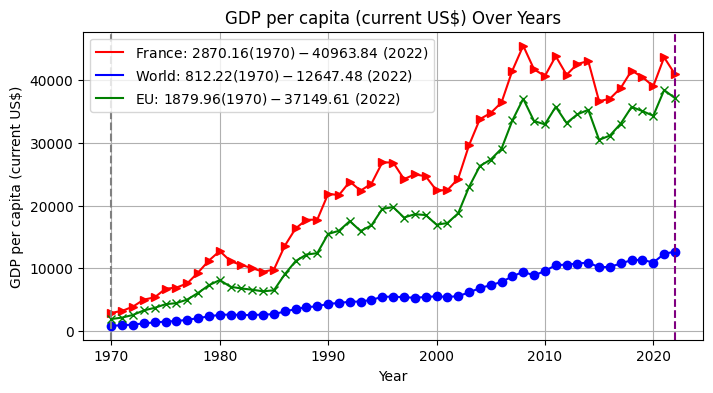

In [7]:
# Plotting the GDP per capita data
plt.figure(figsize=(8, 4))
plt.plot(gdp_per_capita_data.index, gdp_per_capita_data['World'], label='World', color='blue',marker = "o")
plt.plot(gdp_per_capita_data.index, gdp_per_capita_data['France'], label='France', color='red',marker =">")
plt.plot(gdp_per_capita_data.index, gdp_per_capita_data['European Union'], label='European Union', color='green',marker = "x")
plt.title('GDP per capita (current US$) Over Years')
plt.xlabel('Year')
plt.ylabel('GDP per capita (current US$)')

# Add vertical lines or markers for the years 1970 and 2022
plt.axvline(x=1970, color='gray', linestyle='--')
plt.axvline(x=2022, color='purple', linestyle='--')

# Get the GDP per capita values for France, World, and European Union in 1970 and 2022
gdp_france_1970 = gdp_per_capita_data.loc[1970, 'France']
gdp_world_1970 = gdp_per_capita_data.loc[1970, 'World']
gdp_eu_1970 = gdp_per_capita_data.loc[1970, 'European Union']
gdp_france_2022 = gdp_per_capita_data.loc[2022, 'France']
gdp_world_2022 = gdp_per_capita_data.loc[2022, 'World']
gdp_eu_2022 = gdp_per_capita_data.loc[2022, 'European Union']

# Define custom legend entries with specific colors for France, World, and European Union
custom_legend = [
    plt.Line2D([0], [0], color='red', linestyle='-', label=f'France: ${gdp_france_1970:.2f} (1970) - ${gdp_france_2022:.2f} (2022)'),
    plt.Line2D([0], [0], color='blue', linestyle='-', label=f'World: ${gdp_world_1970:.2f} (1970) - ${gdp_world_2022:.2f} (2022)'),
    plt.Line2D([0], [0], color='green', linestyle='-', label=f'EU: ${gdp_eu_1970:.2f} (1970) - ${gdp_eu_2022:.2f} (2022)'),
]

# Combine the custom legend entries with the existing legend
plt.legend(handles=custom_legend)

plt.grid(True)

# Save the plot as a PNG file
plt.savefig('GDP_per_capita_plot.png')

# Show the plot
plt.show()


In [21]:
# Cross-Country Comparison and Ranking Analysis
# Calculating mean values for comparison
mean_gdp = gdp_data.mean()
mean_gdp_growth = gdp_growth_data.mean()
mean_gdp_per_capita = gdp_per_capita_data.mean()

# Cross-Country Comparison
comparison = pd.DataFrame({
    'Indicator': ['GDP (current US$)', 'GDP Growth (annual %)', 'GDP per capita (current US$)'],
    'World Average': [mean_gdp['World'], mean_gdp_growth['World'], mean_gdp_per_capita['World']],
    'France': [mean_gdp['France'], mean_gdp_growth['France'], mean_gdp_per_capita['France']],
    'European Union': [mean_gdp['European Union'], mean_gdp_growth['European Union'], mean_gdp_per_capita['European Union']]
})

# Ranking Analysis
comparison['France Rank'] = comparison['France'].rank(ascending=False)
comparison['European Union Rank'] = comparison['European Union'].rank(ascending=False)

print(comparison)

                      Indicator  World Average        France  European Union  \
0             GDP (current US$)   3.810371e+13  1.532579e+12    8.304634e+12   
1         GDP Growth (annual %)   3.134600e+00  2.095229e+00    2.132120e+00   
2  GDP per capita (current US$)   5.795984e+03  2.440903e+04    1.910287e+04   

   France Rank  European Union Rank  
0          1.0                  1.0  
1          3.0                  3.0  
2          2.0                  2.0  


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate 5-year moving average for 'World' GDP
gdp_data['World_MA'] = gdp_data['World'].rolling(window=3).mean()
gdp_data['France_MA'] = gdp_data['France'].rolling(window=3).mean()
gdp_data['European Union_MA'] = gdp_data['European Union'].rolling(window=3).mean()



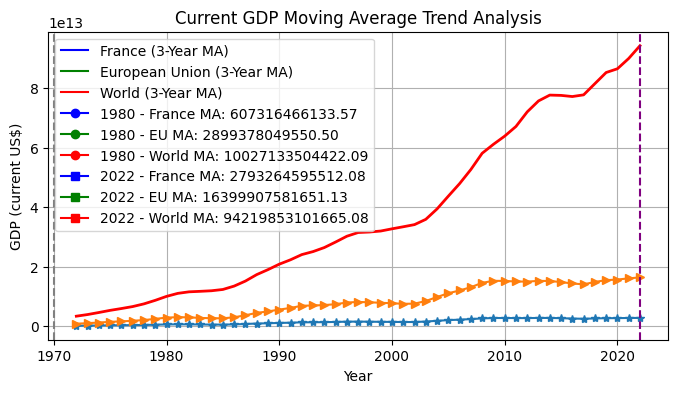

In [9]:
# Plotting the GDP Moving Average data
plt.figure(figsize=(8, 4))
plt.plot(gdp_data.index, gdp_data['France_MA'], label='France (3-year MA)', marker = "*")
plt.plot(gdp_data.index, gdp_data['European Union_MA'], label='European Union (3-year MA)', marker = ">")
plt.plot(gdp_data.index, gdp_data['World_MA'], label='World (3-Year MA)', color='red', linewidth=2)
plt.title('Current GDP Moving Average Trend Analysis')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')

plt.axvline(x=1970, color='gray', linestyle='--')
plt.axvline(x=2022, color='purple', linestyle='--')

# Calculate and display the moving average values for 1980 and 2020
ma_value_france_1980 = gdp_data.loc[1980, 'France_MA']
ma_value_eu_1980 = gdp_data.loc[1980, 'European Union_MA']
ma_value_world_1980 = gdp_data.loc[1980, 'World_MA']
ma_value_france_2022 = gdp_data.loc[2022, 'France_MA']
ma_value_eu_2022 = gdp_data.loc[2022, 'European Union_MA']
ma_value_world_2022 = gdp_data.loc[2022, 'World_MA']

# Define custom legend entries with the moving average values for 1980 and 2020
custom_legend = [
    plt.Line2D([0], [0], linestyle='-', color='blue', label=f'France (3-Year MA)'),
    plt.Line2D([0], [0], linestyle='-', color='green', label=f'European Union (3-Year MA)'),
    plt.Line2D([0], [0], linestyle='-', color='red', label=f'World (3-Year MA)'),
    plt.Line2D([0], [0], marker='o', color='blue', label=f'1980 - France MA: {ma_value_france_1980:.2f}'),
    plt.Line2D([0], [0], marker='o', color='green', label=f'1980 - EU MA: {ma_value_eu_1980:.2f}'),
    plt.Line2D([0], [0], marker='o', color='red', label=f'1980 - World MA: {ma_value_world_1980:.2f}'),
    plt.Line2D([0], [0], marker='s', color='blue', label=f'2022 - France MA: {ma_value_france_2022:.2f}'),
    plt.Line2D([0], [0], marker='s', color='green', label=f'2022 - EU MA: {ma_value_eu_2022:.2f}'),
    plt.Line2D([0], [0], marker='s', color='red', label=f'2022 - World MA: {ma_value_world_2022:.2f}')
]

# Combine the custom legend entries with the existing legend
plt.legend(handles=custom_legend)

plt.grid(True)
# Save the plot as a PNG file
plt.savefig('moving_average_plot.png')

# Show the plot
plt.show()


In [24]:
print("Name: Muhammad Qamar Abbas")
print("Erp: 22092")

Name: Muhammad Qamar Abbas
Erp: 22092
